<a href="https://colab.research.google.com/github/wassanchez/DS_Wilson/blob/main/sexta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import os
import numpy as np
import pandas as pd
# Librería para medidas de posición y forma
import scipy
import scipy.stats as stats
# Librerías para visualización
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly

## Estadística descricriptiva

In [ ]:
df = pd.read_csv(filepath_or_buffer='https://storage.googleapis.com/datasets-academy/Track%20Data%20Science/01_Intro_Python/PWT91.csv'
                ,sep = ',',
                 decimal = '.')
df_p = df
df.head(100)

,countrycode,country,year,rgdpo,pop,emp,avh,hc
0,ABW,Aruba,1950,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,1951,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,1952,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,1953,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,1954,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
95,AGO,Angola,1977,27101.01953,8.130988,4.111429,NaN,1.033385
96,AGO,Angola,1978,24654.34766,8.376147,4.209530,NaN,1.035939
97,AGO,Angola,1979,24989.89453,8.641521,4.290003,NaN,1.038498
98,AGO,Angola,1980,25335.56836,8.929900,4.300710,NaN,1.041064


desviación estandar  y varianza para la población
ddof = 0
desviación estandar y varianza para una muestra.
ddof = 1

In [ ]:
hc = df['hc']
print("desviación estandar de la población", hc.std(ddof = 0))
print("varianza de la población", hc.var(ddof = 0))


desviación estandar de la población 0.7207301419533889
varianza de la población 0.5194519375201521


In [ ]:
hc = df['hc']
print("desviación estandar de la muestra", hc.std(ddof = 1))
print("varianza de la muestra", hc.var(ddof = 1))

desviación estandar de la muestra 0.7207735685880773
varianza de la muestra 0.5195145371751918


In [ ]:
df.describe()

,year,rgdpo,pop,emp,avh,hc
count,12376.000000,9.985000e+03,9985.000000,8841.000000,3373.000000,8299.000000
mean,1983.500000,2.691928e+05,30.736765,14.799485,1984.099941,2.064241
std,19.628579,1.070178e+06,114.569825,59.107713,272.879958,0.720774
min,1950.000000,1.977999e+01,0.004376,0.001180,1353.886841,1.007038
25%,1966.750000,6.380658e+03,1.634517,0.940000,1799.336060,1.431531
50%,1983.500000,2.710632e+04,6.115370,3.021000,1972.072876,1.954407
75%,2000.250000,1.374726e+05,19.891548,8.583438,2149.860352,2.649120
max,2017.000000,1.838384e+07,1409.517456,792.575317,2910.734863,3.974208


In [ ]:
hc.quantile(np.arange(0.1,1,0.1))

0.1    1.167162
0.2    1.333424
0.3    1.529664
0.4    1.736294
0.5    1.954407
0.6    2.224552
0.7    2.528049
0.8    2.771899
0.9    3.114409
Name: hc, dtype: float64

In [ ]:
df['pop'].quantile(np.arange(0.1,1.1,0.1))

0.1       0.260240
0.2       0.908202
0.3       2.392449
0.4       4.087941
0.5       6.115370
0.6       9.372860
0.7      14.804754
0.8      26.800200
0.9      56.447388
1.0    1409.517456
Name: pop, dtype: float64

In [ ]:
df['pop'].quantile(np.arange(0.9,1.01,0.01))

0.90      56.447388
0.91      59.703854
0.92      66.185516
0.93      75.220925
0.94      81.685883
0.95      98.368022
0.96     124.759514
0.97     149.068053
0.98     209.384241
0.99     648.442825
1.00    1409.517456
Name: pop, dtype: float64

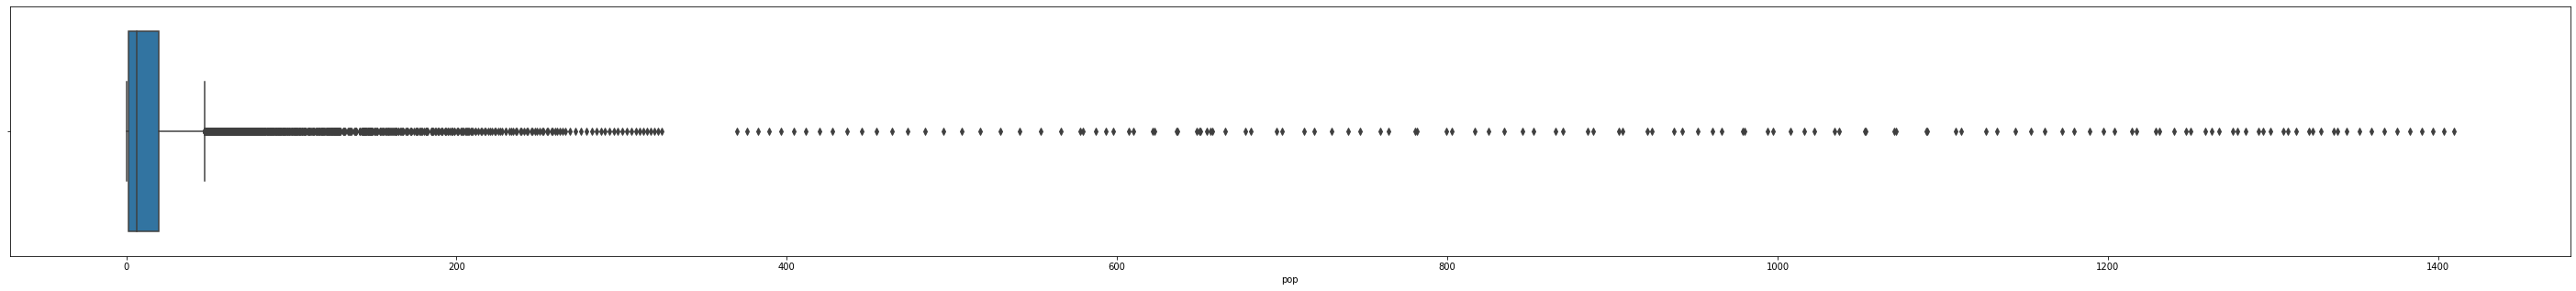

In [ ]:
df.keys()

fig, ax = plt.subplots(figsize = (50, 5))
sns.boxplot(data = df, x ='pop')

In [ ]:
pop = df['pop']
Q1 = pop.quantile(0.25)
Q3 = pop.quantile(0.75)
print("Q1 =",Q1," Q3 =", Q3)

Q1 = 1.634516954  Q3 = 19.89154816


In [ ]:
IQR = Q3-Q1
print("IQR =",IQR)

IQR = 18.257031206


In [ ]:
print("limite inferior ", Q1-(1.5*IQR))
print("limite supérior ", Q3+(1.5*IQR))

limite inferior  -25.751029855000002
limite supérior  47.277094969000004


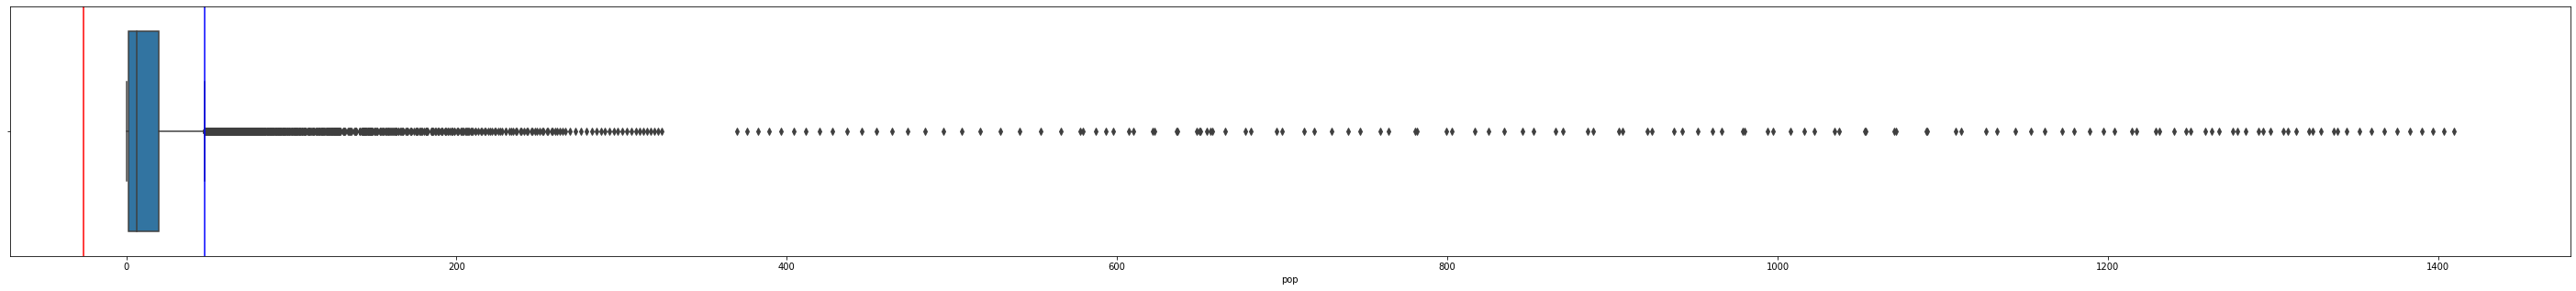

In [ ]:
df.keys()

fig, ax = plt.subplots(figsize = (50, 5))
sns.boxplot(data = df, x ='pop')
plt.axvline(Q3+(1.5*IQR), color="blue",label="Lim. Superior")
plt.axvline(Q1-(1.5*IQR), color="red",label="Lim. Inferior")

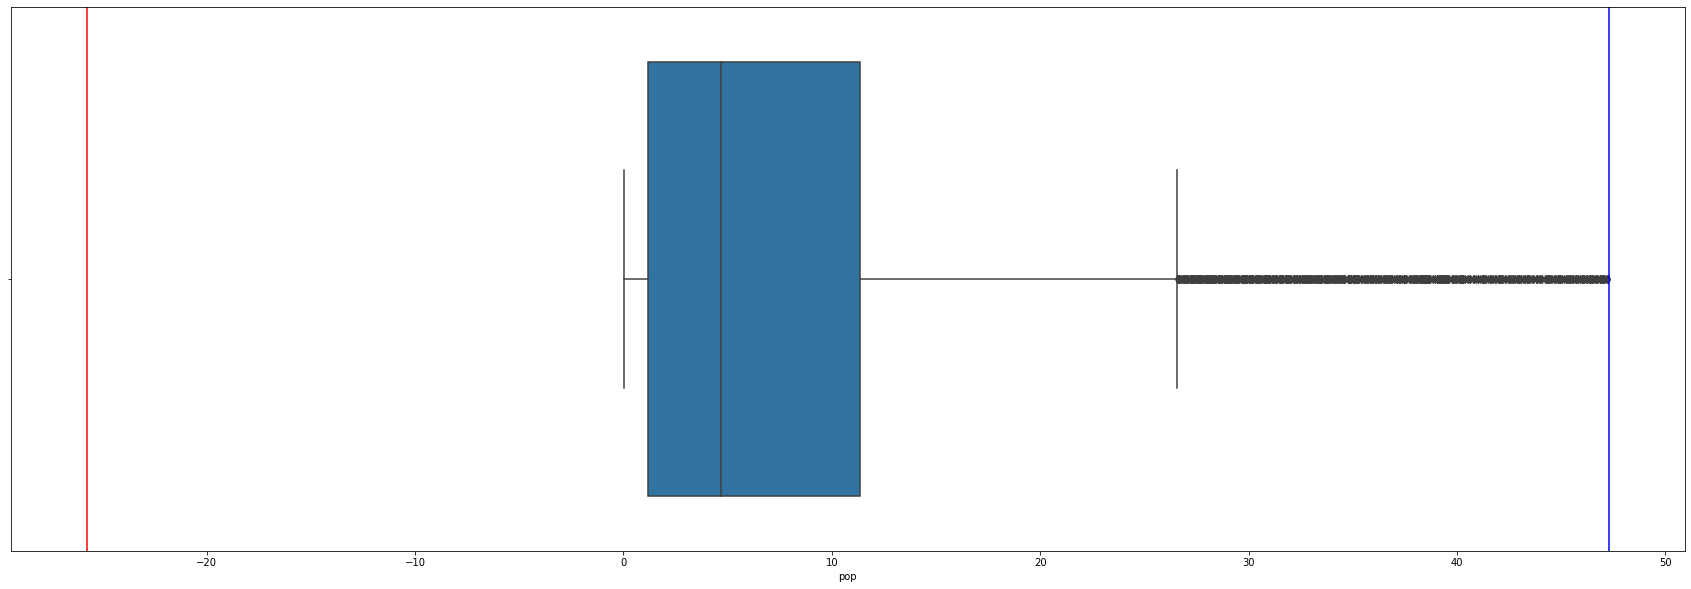

In [ ]:
df_f = df[(df['pop']>= Q1-(1.5*IQR)) & (df['pop'] <= Q3+(1.5*IQR))]
df.keys()

fig, ax = plt.subplots(figsize = (30, 10))
sns.boxplot(data = df_f, x ='pop')
plt.axvline(Q3+(1.5*IQR), color="blue",label="Lim. Superior")
plt.axvline(Q1-(1.5*IQR), color="red",label="Lim. Inferior")

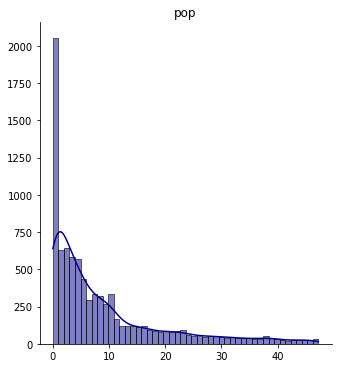

In [ ]:
sns.displot(df_f['pop'].values, color='darkblue', kde=True)
plt.title('pop')
plt.xlabel('')
plt.ylabel('')
#plt.xlim(1000,3000)
#plt.ylim(0,700)
plt.show()

In [ ]:
# positiva esta hacia la derecha negativa esta hacia la izquierda distribución normal tiende a ser 0
print("coeficiente de asimetría ", df_f['pop'].skew( ))

1.684036534165699

In [ ]:
print("coeficiente de curtosis ",df_f['pop'].kurtosis())

coeficiente de curtosis  2.2774181301627023


In [ ]:
data = np.random.normal(0,1, 50000)
print("mean ", np.mean(data))
print("var ", np.var(data))
print("skew ",stats.skew(data))
print("kurt ",stats.kurtosis(data))

mean  0.00019593167386982685
var  1.001432287413179
skew  0.006169206330083193
kurt  0.0007796912822017887


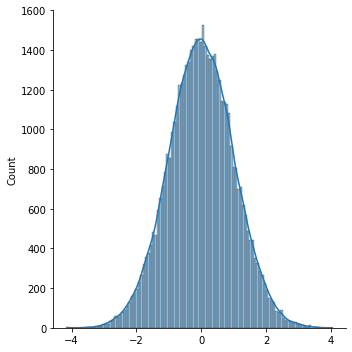

In [ ]:
sns.displot(data, kde = True)
plt.show()

In [ ]:
df.cov().round(decimals = 2)

,year,rgdpo,pop,emp,avh,hc
year,385.28,2.509484e+06,82.76,29.06,-1639.22,6.11
rgdpo,2509484.30,1.145281e+12,70034895.90,39313383.89,-53875627.79,232565.30
pop,82.76,7.003490e+07,13126.24,7069.12,3190.14,-0.39
emp,29.06,3.931338e+07,7069.12,3493.72,1365.33,-0.14
avh,-1639.22,-5.387563e+07,3190.14,1365.33,74463.47,-103.35
hc,6.11,2.325653e+05,-0.39,-0.14,-103.35,0.52


In [ ]:
df.corr().round(decimals = 2)

,year,rgdpo,pop,emp,avh,hc
year,1.00,0.13,0.04,0.03,-0.32,0.46
rgdpo,0.13,1.00,0.57,0.59,-0.11,0.28
pop,0.04,0.57,1.00,0.99,0.06,-0.00
emp,0.03,0.59,0.99,1.00,0.06,-0.00
avh,-0.32,-0.11,0.06,0.06,1.00,-0.59
hc,0.46,0.28,-0.00,-0.00,-0.59,1.00


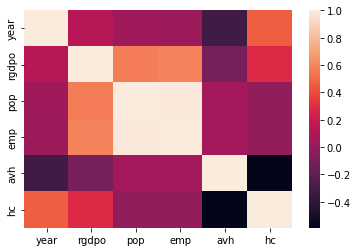

In [ ]:
sns.heatmap(df.corr().round(decimals = 2))
plt.show()